<a href="https://colab.research.google.com/github/thisishasan/slda/blob/hasan/04_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [11]:
# 1. Data Understanding
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=columns)

# Replace '?' with NaN and convert columns to numeric
data = data.replace('?', np.nan)
data = data.apply(pd.to_numeric, errors='coerce')

# Display basic information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

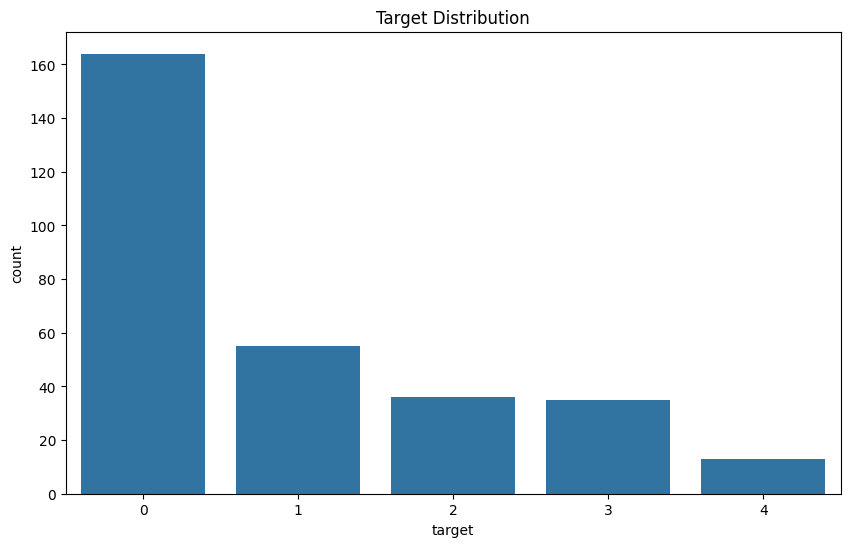

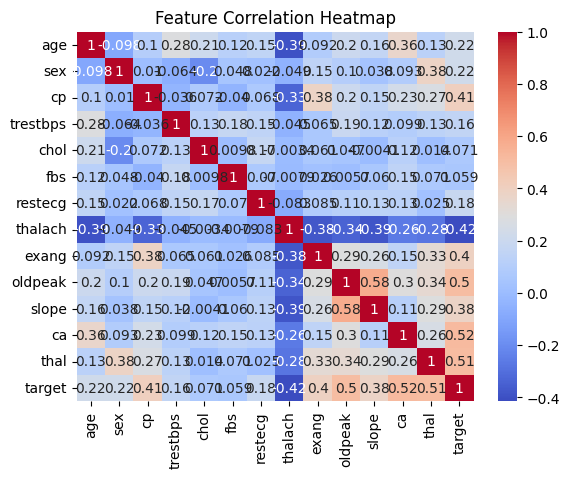

In [12]:
# 2. Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=data)
plt.title('Target Distribution')
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
# 3. Data Preparation
# Handle missing values
data.fillna(data.median(), inplace=True)

# Split features and target
X = data.drop('target', axis=1)
y = data['target']

# Encode target to binary classification
y = y.apply(lambda x: 1 if x > 0 else 0)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77        30
           1       0.84      0.72      0.78        36

    accuracy                           0.77        66
   macro avg       0.78      0.78      0.77        66
weighted avg       0.78      0.77      0.77        66



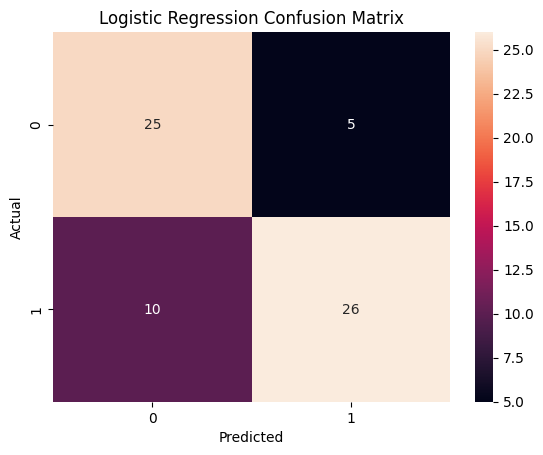


LDA Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78        30
           1       0.84      0.75      0.79        36

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66



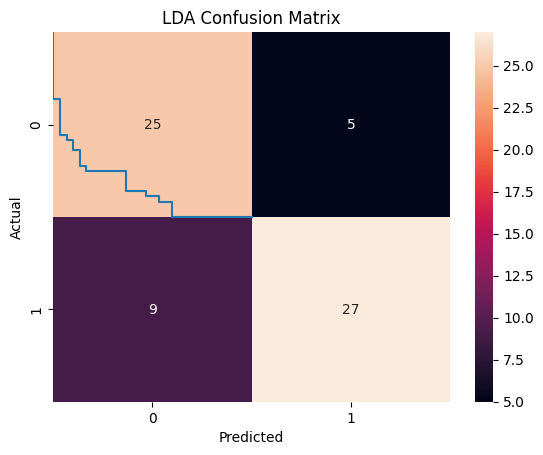


QDA Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.87      0.78        30
           1       0.86      0.69      0.77        36

    accuracy                           0.77        66
   macro avg       0.78      0.78      0.77        66
weighted avg       0.79      0.77      0.77        66



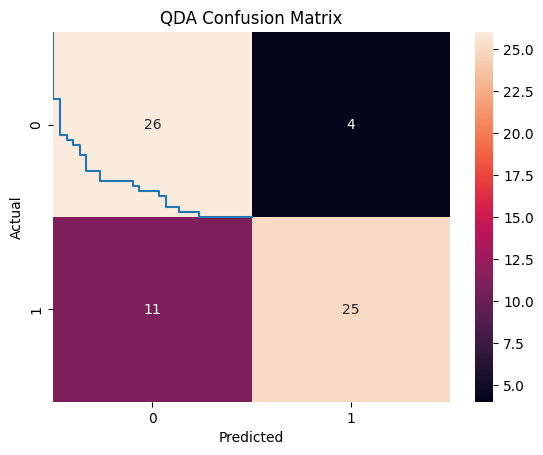


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.76      0.78      0.77        36

    accuracy                           0.74        66
   macro avg       0.74      0.74      0.74        66
weighted avg       0.74      0.74      0.74        66



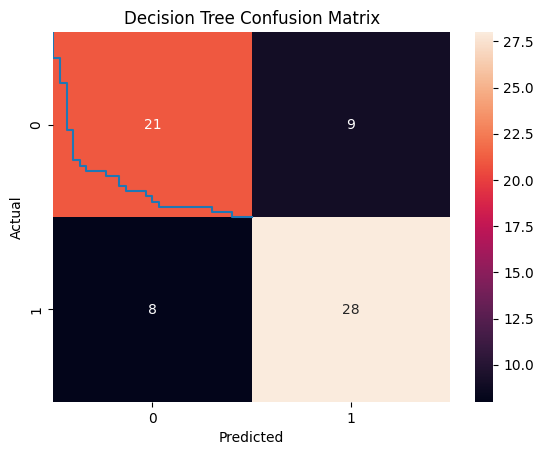

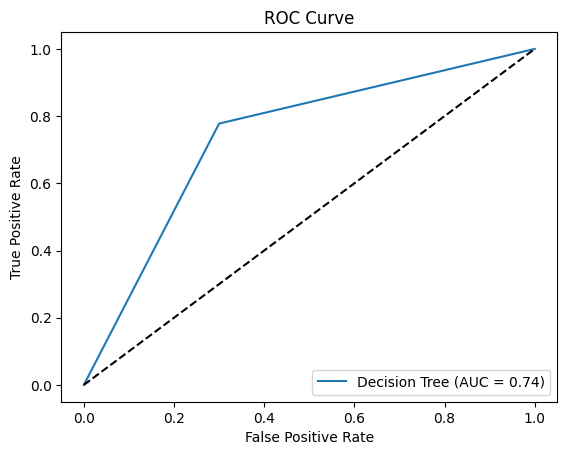

In [14]:
# 4. Model Building and Evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'\n{name} Classification Report:\n', classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [15]:
# 5. Interpretation
# Feature Importance for Decision Tree
feature_importances = models['Decision Tree'].feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print('\nFeature Importances:\n', importance_df)


Feature Importances:
      Feature  Importance
2         cp    0.309562
12      thal    0.122660
9    oldpeak    0.117989
11        ca    0.100568
10     slope    0.085584
4       chol    0.075057
7    thalach    0.070016
0        age    0.044737
3   trestbps    0.042792
1        sex    0.023398
8      exang    0.007638
5        fbs    0.000000
6    restecg    0.000000
